Xây dựng mạng ANN phân lớp chữ cái viết tay. Khai báo các gói numpy, mnist, keras
https://victorzhou.com/blog/keras-neural-network-tutorial/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.datasets import load_iris

C:\Users\DELL\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\DELL\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\DELL\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


Lấy dữ liệu từ mnist. Có 2 tập train và test


In [3]:
data = load_iris()
X=data.data
y=data.target
print(X.shape,y.shape)

(150, 4) (150,)


Có 60000 ảnh train và 10000 ảnh để test

Mạng có 1 lớp vào 784 nút, 2 lớp ẩn mỗi lớp 64 nút, 1 lớp ra 10 nút. Các hàm kích hoạt là relu và softmax

In [4]:
# Build the model.
model = Sequential([
  Dense(30, activation='relu', input_shape=(4,)),
  Dense(30, activation='relu'),
  Dense(3, activation='softmax'),
])


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

Huấn luyện mạng 

In [6]:
history=model.fit(
  X,
  to_categorical(y),
  epochs=10,
  batch_size=32,
)

Epoch 1/10
5/5 [==============================] - 0s 3ms/step - loss: 1.1447 - accuracy: 0.3333
Epoch 2/10
5/5 [==============================] - 0s 3ms/step - loss: 1.0540 - accuracy: 0.3333
Epoch 3/10
5/5 [==============================] - 0s 4ms/step - loss: 0.9630 - accuracy: 0.4733
Epoch 4/10
5/5 [==============================] - 0s 2ms/step - loss: 0.8948 - accuracy: 0.6667
Epoch 5/10
5/5 [==============================] - 0s 3ms/step - loss: 0.8405 - accuracy: 0.6667
Epoch 6/10
5/5 [==============================] - 0s 3ms/step - loss: 0.7928 - accuracy: 0.6667
Epoch 7/10
5/5 [==============================] - 0s 3ms/step - loss: 0.7499 - accuracy: 0.6867
Epoch 8/10
5/5 [==============================] - 0s 2ms/step - loss: 0.7084 - accuracy: 0.7000
Epoch 9/10
5/5 [==============================] - 0s 3ms/step - loss: 0.6659 - accuracy: 0.7200
Epoch 10/10
5/5 [==============================] - 0s 3ms/step - loss: 0.6294 - accuracy: 0.7400


In [7]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


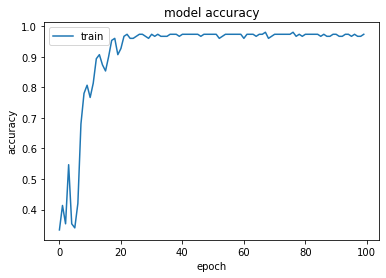

In [42]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

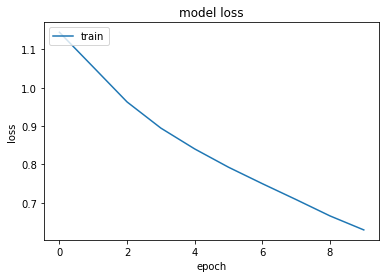

In [8]:
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
model.evaluate(
  X,
  to_categorical(y)
)

5/5 [==============================] - 0s 2ms/step - loss: 0.6081 - accuracy: 0.8067


[0.6080840826034546, 0.8066666722297668]

In [12]:
import keras
model.save('iris.h5')

In [13]:
model1 = keras.models.load_model("iris.h5")

Thử lấy model đã lưu trong model.h5 - không phải đào tạo lại

In [14]:
predictions = model1.predict(X)
# Print our model's predictions.
print(np.argmax(predictions, axis=1)) 

# Check our predictions against the ground truths.
print(y) 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 2 2 2 2 1 2 2 2 1 2 2 1 1 2 1 2 2 2 1 2 2
 1 1 2 2 2 1 2 1 1 2 2 1 2 2 1 2 2 2 2 1 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
